In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"D:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
sys.path.append(r"D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver")
sys.path.append(r"D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine")

from distribution_operation import *
from utils import *
from numerical_routine import *
from posterior_computation import *
from ash import *

In [3]:
betahat=  np.array([1,2,3,4,5])
sebetahat=np.array([1,0.4,5,1,1])

res= ash(betahat, sebetahat)

In [4]:
true_val1=  np.random.normal(loc=0, scale=2, size=100)
true_val0=  np.zeros( 100)

observations_mu_1 =true_val1+np.random.normal(loc=0, scale=1, size=100)
observations_mu_0 =true_val0+ np.random.normal(loc=0, scale=1, size=100)
# Combine them into one array
betahat = np.hstack([observations_mu_1, observations_mu_0])
sebetahat=  np.repeat(1, betahat.shape[0])
mult=1.5

In [5]:
res= ash(betahat, sebetahat, prior="exp")
print(res.pi) 

[8.45405853e-01 1.95520258e-04 4.36898872e-05 9.76269772e-06
 2.52108681e-06 1.01185372e-06 1.09358893e-06 6.12128410e-06
 1.59866747e-04 6.97236362e-03 9.56089397e-02 5.13958892e-02
 1.97363203e-04 3.23894590e-09 2.61905405e-10 1.43786899e-10]


In [6]:
res.scale

array([0.        , 0.0775147 , 0.10962233, 0.15502939, 0.21924467,
       0.31005878, 0.43848933, 0.62011756, 0.87697867, 1.24023513,
       1.75395734, 2.48047025, 3.50791467, 4.9609405 , 7.01582934,
       9.921881  ])

Text(0, 0.5, 'posterior mean')

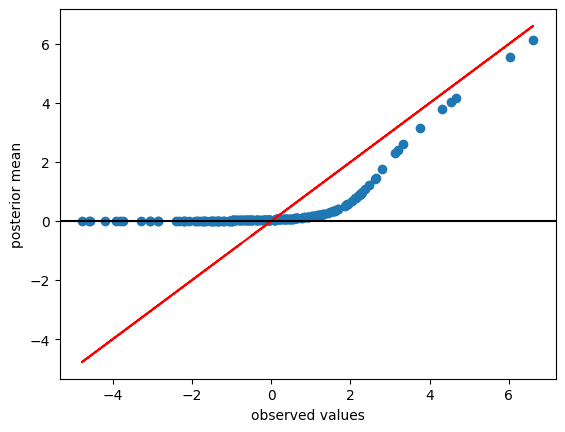

In [7]:
plt.scatter(betahat, res.post_mean  )
plt.xlabel("observed values")
plt.plot(betahat, betahat, color='red', label='x = y')
plt.axhline(y=0, color="black")
plt.ylabel("posterior mean")

In [8]:
betahat=  np.array([1,2,-30000,4,5])
sebetahat=np.array([1e-6,0.4,1e-6,10000,1])

In [9]:
res= ash(betahat, sebetahat)

In [10]:
res= ash(betahat, sebetahat, prior="exp")
print(res.pi) 

[7.00869937e-01 8.53978352e-03 7.63329082e-12 8.54872792e-03
 7.67352848e-12 7.68970601e-12 8.54696420e-03 7.69381384e-12
 8.54713172e-03 7.69444825e-12 8.54722887e-03 7.69524127e-12
 8.54726897e-03 7.69685902e-12 7.71367097e-12 8.57183996e-03
 1.01465185e-11 1.82251040e-11 3.87561094e-11 8.23604677e-11
 2.15605296e-02 3.76102974e-10 6.16633302e-06 2.33908990e-02
 1.91856733e-01 2.46671612e-03 7.22989141e-08 2.80465476e-10
 1.54606042e-10 9.52598159e-11 6.30557828e-11 4.40043399e-11
 3.20834470e-11 2.43385946e-11 1.91760576e-11 1.56730977e-11
 1.32662135e-11 1.15970408e-11 1.04302916e-11 9.60696602e-12
 9.01593086e-12 8.57487097e-12 8.21633238e-12 7.87692134e-12
 7.49153120e-12 6.99833842e-12 6.35783489e-12 5.57523868e-12
 4.70437974e-12 3.82479762e-12 3.00959258e-12 2.30521951e-12
 1.72875999e-12]


D:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine\numerical_routine.py:87: RuntimeWarning: overflow encountered in multiply
  beta_frac = beta * np.exp( np.clip(stats.norm.logpdf(beta) - pnorm_diff, None, 700))


Text(0, 0.5, 'posterior mean')

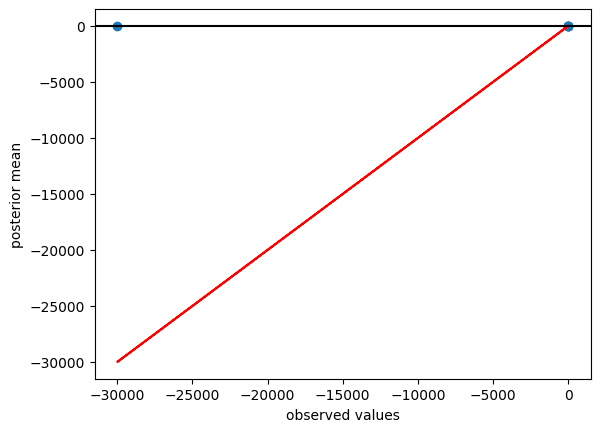

In [11]:
plt.scatter(betahat, res.post_mean  )
plt.xlabel("observed values")
plt.plot(betahat, betahat, color='red', label='x = y')
plt.axhline(y=0, color="black")
plt.ylabel("posterior mean")

In [13]:
res.post_mean

array([1.        , 1.93050488, 0.        , 0.59857401, 4.62006475])